In [1]:
# パーティクルフィルタのパラメータ測定シミュレータ
import sys
sys.path.append('../scripts/')
from robot import *

<IPython.core.display.Javascript object>


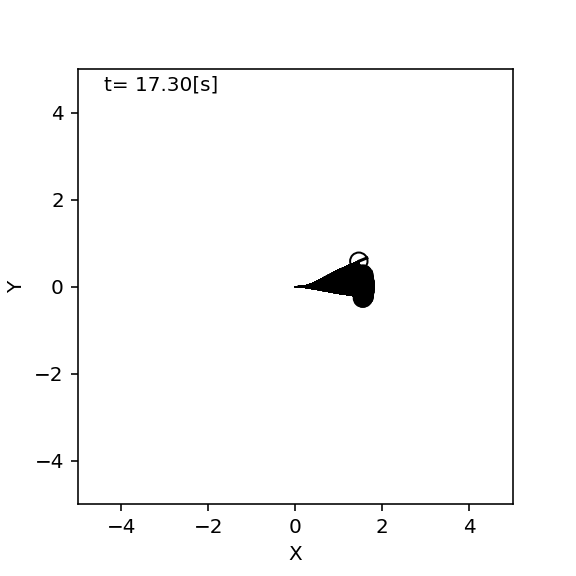

In [5]:
#import copy

world = World(40.0,0.1)

initial_pose = np.array([0,0,0]).T
robots = []
r = Robot(initial_pose,sensor = None,agent = Agent(0.1,0.0))

# 誤差ありロボットを100台走らせて、移動後の姿勢を記録
for i in range(100):
    copy_r = copy.copy(r)
    copy_r.distance_until_noise = copy_r.noise_pdf.rvs()
    world.append(copy_r)
    robots.append(copy_r)
    
world.draw()

In [6]:
# 全ロボットの姿勢を表にまとめる
# バイアスがあるので、σ_νν != 0
import pandas as pd
poses = pd.DataFrame([[math.sqrt(r.pose[0]**2 + r.pose[1]**2),r.pose[2]] for r in robots],
                     columns = ['r','theta'])
poses.transpose()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
r,1.604025,1.603937,1.601995,1.605527,1.588071,1.601223,1.606021,1.586458,1.605457,1.603495,...,1.602116,1.606935,1.606280,1.605775,1.603215,1.602969,1.606678,1.605031,1.601958,1.604839
theta,0.023551,-0.093344,-0.165063,-0.061253,0.447461,-0.153621,-0.101759,-0.376722,0.146763,0.205304,...,-0.125757,0.022420,-0.031052,0.092161,-0.181379,-0.036886,-0.068519,-0.209312,-0.233995,-0.049195


In [7]:
# σ_νν
print(poses["r"].var())
print(poses["r"].mean())
math.sqrt(poses["r"].var() / poses["r"].mean())

1.2599413761173241e-05
1.603824496766123


0.002802829938939075

In [8]:
# σ_νw
print(poses["r"].var())
print(poses["theta"].mean())
math.sqrt(poses["r"].var() / poses["theta"].mean())


1.2599413761173241e-05
0.01131594427822856


0.03336796866592143